In [1]:
import PIL.Image # python imaging library
import os, shutil # used for operations on files (os for files, shutil for directories)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [2]:
# print(im.size)
# im_r = im.rotate(90) # this seems to only be a view on the image
# im_r.save('im_r.jpg')
# print(im_r.size)

(1100, 679)


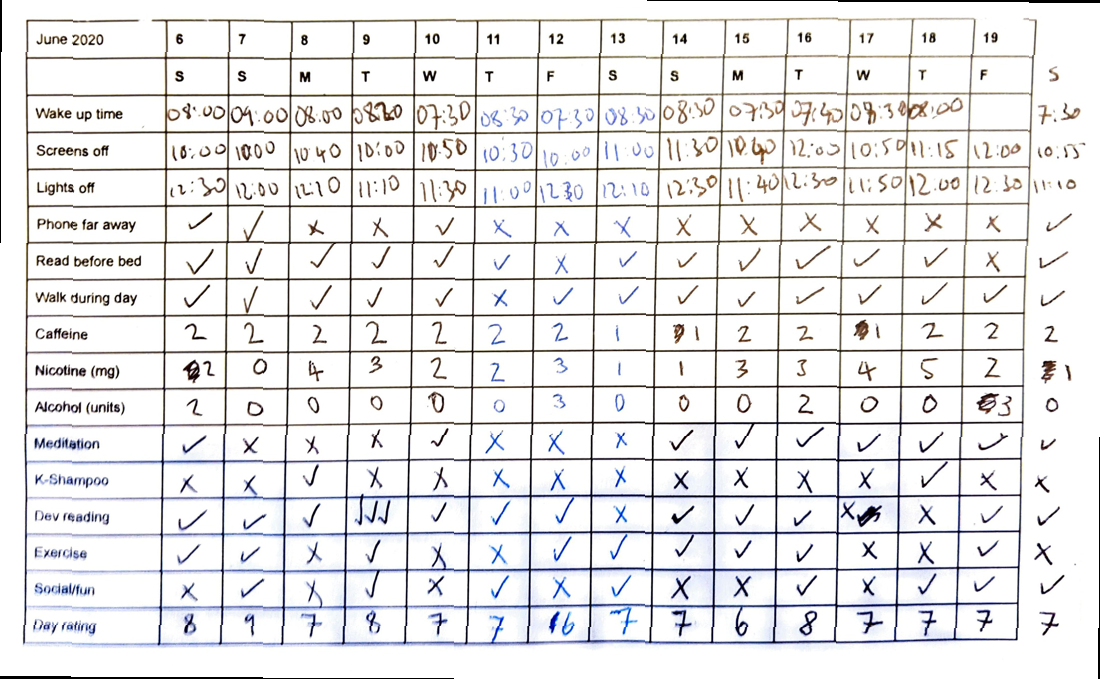

In [3]:
# Open the file 
im = Image.open("06-06-2020_19_06_2020.jpg") 
# Rotate it
im = im.transpose(PIL.Image.ROTATE_90) 

# Resize image https://pillow.readthedocs.io/en/stable/reference/Image.html
(width, height) = (im.width // 2, im.height // 2)
im = im.resize((width, height))
print(im.size)

im = im.rotate(-0.3) # Rotating the image very slightly, by 0.5 deg counter-clockwise 
# https://pillow.readthedocs.io/en/stable/reference/Image.html

im

Text(0.5, 1.0, 'First habit tracker')

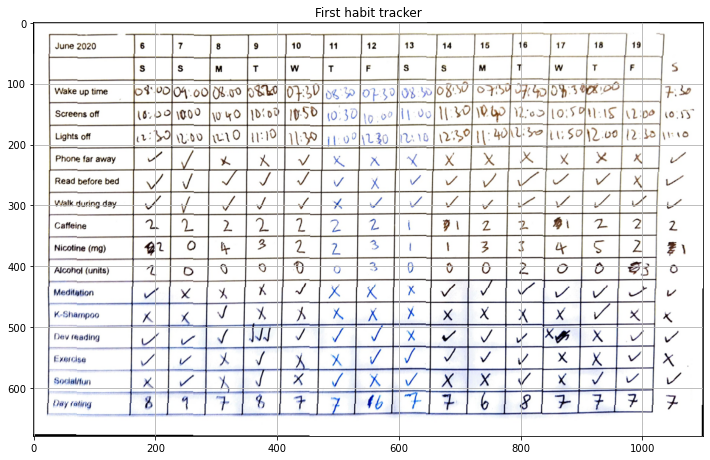

In [4]:
fig, ax = plt.subplots(figsize=(12,12))
# fig = plt.figure(figsize=(5,20))
# ax = fig.add_subplot(1, 1, 1)
ax.imshow(im)
ax.grid(which='both')
ax.set_title('First habit tracker')

In [5]:
# Crop this just for the sections that have data
# Format is ((left, upper, right, lower)) 
im_crop = im.crop((20, 90, 1035, 650)) 

Text(0.5, 1.0, 'Crop for data')

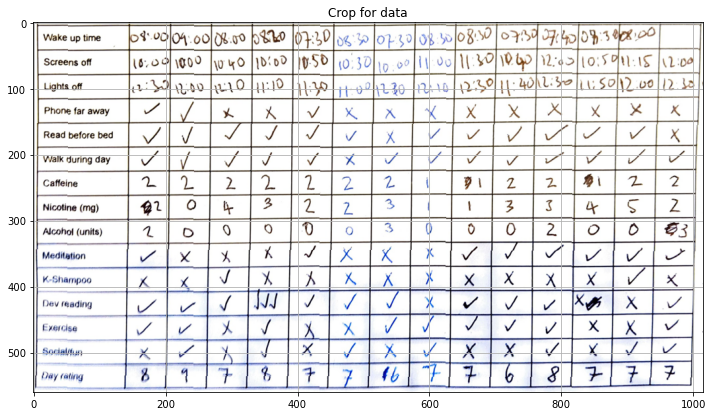

In [6]:
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.imshow(im_crop)
ax1.grid(which='both')
ax1.set_title('Crop for data')

In [7]:
# Ok, next trick is to split this into rows
# Plan is to split it into the number of rows, then loop through and produce multiple figures on the same chart
im_crop.size

(1015, 560)

In [48]:
# There are fifteen rows, and fourteen columns
# So approx 560 / 15 for each row height
i = 1
rows = []
while i < 560:
    rows.append(i)
    i = i + (560/15)
    i = round(i)
print(rows)
print(len(rows))

[1, 38, 75, 112, 149, 186, 223, 260, 297, 334, 371, 408, 445, 482, 519, 556]
16


In [133]:
# Looping through the grid to chop each row
# Format is ((left, upper, right, lower)) 
i = 1
image_rows = []
while i in range(len(rows)-1): # Looping through the rows, chopping off bars at top and bottom 
    image_rows.append(im_crop.crop((1, rows[i]+3, 1014, rows[i+1]-4))) 
    i = i + 1

In [134]:
image_rows[0]

In [89]:
len(image_rows) # it's a list, not an array

14

In [60]:
fig2.clf()

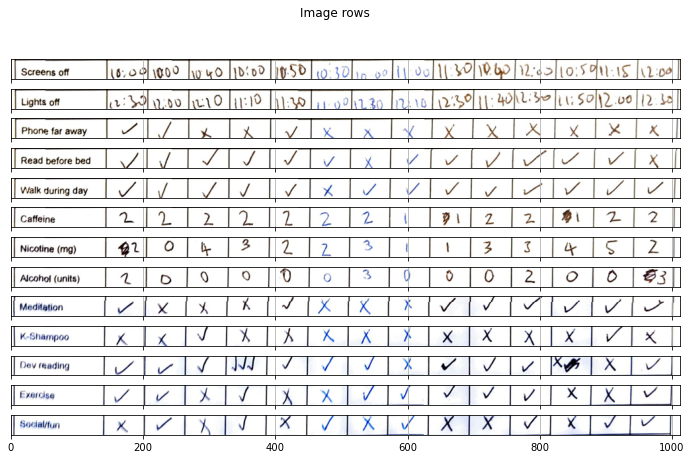

In [99]:
fig2, axs = plt.subplots(13,1,sharex=True,sharey=True,figsize=(12,7))
fig2.suptitle('Image rows')

i = 0
for i in range (0,13): 
    axs[i].imshow(array[i])
    axs[i].grid(which='both')
    axs[i].yaxis.set_visible(False)
    i = i + 1
    

In [123]:
print(image_rows[0].size)
# Left, upper, right, lower
image_rows[0].crop((0,1,145,30))
# im_crop = im.crop((20, 90, 1035, 650)) 

(1013, 30)


In [132]:
print(image_rows[0].crop((145,0,205,30)).size)
image_rows[0].crop((145,1,205,30))

(60, 30)


In [ ]:
column_area = 